<a href="https://colab.research.google.com/github/FrancescoSarandrea/deeplearning/blob/main/DEEP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importa solite librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importa librerie da sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import tree

In [ ]:
df=pd.read_csv('heart_2020_cleaned.csv')

In [ ]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [ ]:
# e' necessario codificare manualmente le variabili categoriche (non quantitative)
# categB contiene categorie binarie 
categB=['HeartDisease', 'Smoking', 'AlcoholDrinking','Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease','SkinCancer']
#categA continene categorie non binarie
categA=['Race', 'Diabetic','GenHealth']

In [ ]:
# dobbiamo creare una mappa cosi' che ad ogni AgeCathegory associ
# il valore medio
enc_Age={'55-59':57, '80 or older': 85, '65-69': 67, '75-79':77, '40-44':42,
         '70-74':72,'60-64':62, '50-54':52,'45-79':77,
         '18-24':21,'35-39':37,'30-34':32,'25-29':27}

In [ ]:
# salviamo le eta' come float
record=df['AgeCategory'].map(enc_Age)
df['AgeCathegory']=record.astype('float')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,AgeCathegory
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,57.0
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,85.0
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,67.0
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,77.0
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No,62.0
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No,37.0
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No,NaN
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No,27.0


In [ ]:
# il LabelEnoder guarda i dati presenti nella colonna, conta quante modalita' 
# ci sono e le numera
le= LabelEncoder()
for col in categB:
  df[col]=le.fit_transform(df[col])
df

le = LabelEncoder()
for col in categVar:
    df[col] = le.fit_transform(df[col])

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,AgeCathegory
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,Yes,1,Very good,5.0,1,0,1,57.0
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,No,1,Very good,7.0,0,0,0,85.0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,Yes,1,Fair,8.0,1,0,0,67.0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,No,0,Good,6.0,0,0,1,77.0
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,No,1,Very good,8.0,0,0,0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60-64,Hispanic,Yes,0,Fair,6.0,1,0,0,62.0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35-39,Hispanic,No,1,Very good,5.0,1,0,0,37.0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45-49,Hispanic,No,1,Good,6.0,0,0,0,NaN
319793,0,32.81,0,0,0,0.0,0.0,0,0,25-29,Hispanic,No,0,Good,12.0,0,0,0,27.0


In [ ]:
# qui scomponiamo le variabili non binarie in tutti i possibili valori, cosi'
# che ottenga valori solo binari
df=pd.get_dummies(df, columns=categA, prefix=['race','diabet','genh'])
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,race_White,diabet_No,"diabet_No, borderline diabetes",diabet_Yes,diabet_Yes (during pregnancy),genh_Excellent,genh_Fair,genh_Good,genh_Poor,genh_Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,...,1,0,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,...,1,0,0,1,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,...,1,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60-64,...,0,0,0,1,0,0,1,0,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35-39,...,0,1,0,0,0,0,0,0,0,1
319792,0,24.24,0,0,0,0.0,0.0,0,0,45-49,...,0,1,0,0,0,0,0,1,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25-29,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
# pra possiamo identificare i gruppi training e validation
# e' possibile specificare se vogliamo fare una suddivisione stratificata
# bisogna stratificare rispetto alla variabile target, in questo caso HeartDisease
train_df, val_df= train_test_split(df, test_size=0.2, random_state=0, stratify=df['HeartDisease'])

In [ ]:
# possiamo comparare il numero di occorrenze dei due valori di HeartDisease
# notiamo che la variabile e' molto sbilanciata, quindi e' opportuno 
# eseguire un bilanciamento 
train_df['HeartDisease'].value_counts()

0    233938
1     21898
Name: HeartDisease, dtype: int64

In [ ]:
# determiniamo quali sono gli zeri e quali sono uno 1
class_0=train_df[train_df['HeartDisease']==0]
class_1=train_df[train_df['HeartDisease']==1]

In [ ]:
# creiamo una nuova classe 1A, campionando valori dalla classe 1 
# creando molte repliche, finche' non raggiungiamo la lunghezza della classe 0
class_1A= class_1.sample(len(class_0), replace=True)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,race_White,diabet_No,"diabet_No, borderline diabetes",diabet_Yes,diabet_Yes (during pregnancy),genh_Excellent,genh_Fair,genh_Good,genh_Poor,genh_Very good
104553,1,23.11,1,0,0,0.0,0.0,0,1,65-69,...,0,1,0,0,0,0,1,0,0,0
12951,1,25.85,1,0,0,0.0,0.0,0,1,30-34,...,1,1,0,0,0,0,0,0,0,1
257182,1,31.17,1,0,0,0.0,0.0,0,1,75-79,...,1,0,0,1,0,0,0,1,0,0
300222,1,37.55,0,0,0,0.0,0.0,0,0,70-74,...,1,0,0,1,0,0,0,1,0,0
16776,1,22.05,1,0,0,2.0,0.0,0,1,65-69,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305120,1,23.06,1,0,1,10.0,0.0,0,1,60-64,...,1,0,0,1,0,0,0,1,0,0
307478,1,32.55,0,0,0,0.0,0.0,0,1,65-69,...,1,1,0,0,0,0,0,0,0,1
116109,1,24.75,1,0,0,0.0,0.0,0,1,50-54,...,1,1,0,0,0,0,0,0,0,1
228226,1,34.50,0,0,0,0.0,0.0,1,0,60-64,...,1,0,0,1,0,0,1,0,0,0


In [ ]:
# concateniamo rispetto alle righe le due classi con lo stesso numero di elementi 
train= pd.concat([class_0, class_1A], axis=0)
train['HeartDisease'].value_counts()

0    233938
1    233938
Name: HeartDisease, dtype: int64

In [ ]:
# ora possiamo operare il fitting, bisogna specificare quale sono le variabili 
# di training e quale la target
y_train=train['HeartDisease']
# per training diamo tutte le variabili tranne quella di target
x_train=train.drop(labels=['HeartDisease'], axis=1)

In [ ]:
y_val=val_df['HeartDisease']
x_val=val_df.drop(labels=['HeartDisease'], axis=1)

In [ ]:
# usando DecisionTreeClassifier senza argomenti facciamo il fit con 
# i valori di default, questo produrra' overfitting
clf=DecisionTreeClassifier()

In [ ]:
clf.fit(x_train, y_train)

ValueError: ignored

In [ ]:
!python3 "heartdisease_complete.ipynb"

Traceback (most recent call last):
  File "heartdisease_complete.ipynb", line 17, in <module>
    "execution_count": null,
NameError: name 'null' is not defined


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


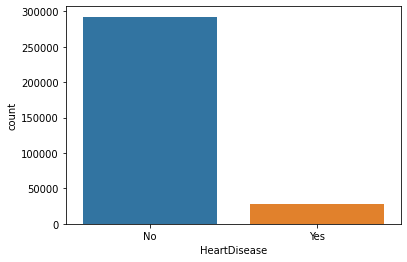

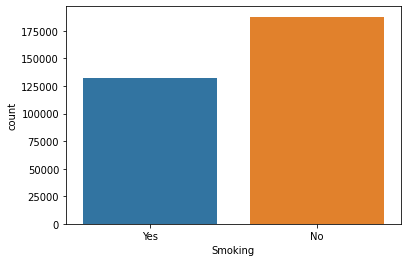

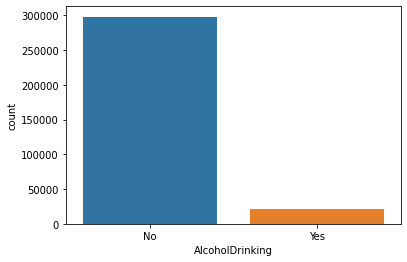

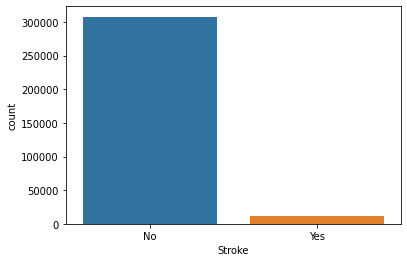

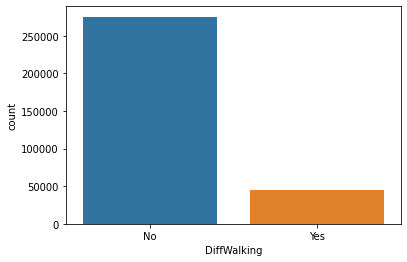

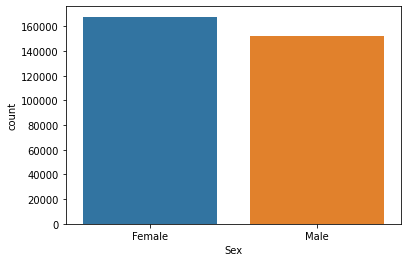

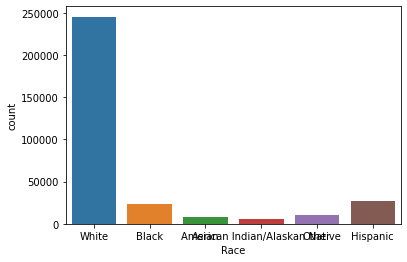

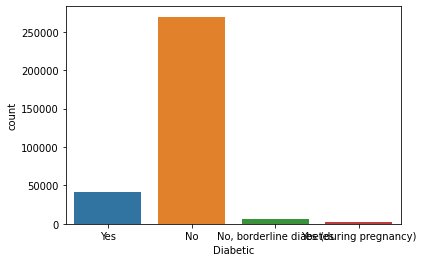

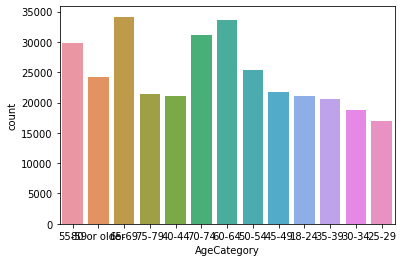

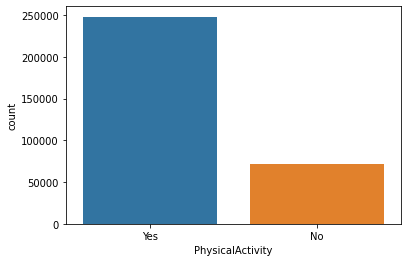

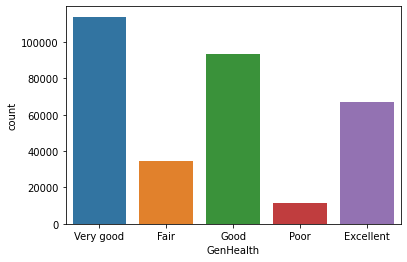

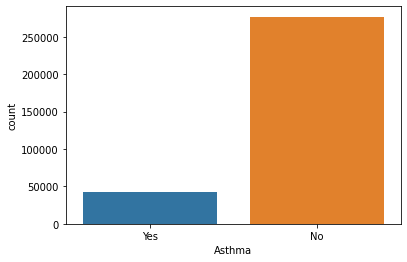

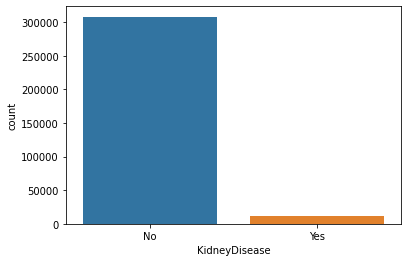

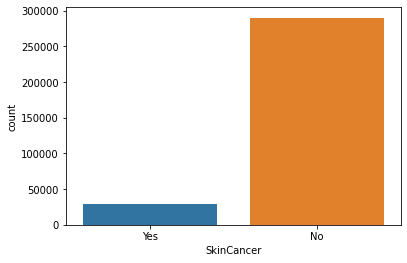

In [ ]:
import seaborn as sns
categ = ["HeartDisease", "Smoking", "AlcoholDrinking","Stroke",
        "DiffWalking", "Sex", 'Race', 'Diabetic', 'AgeCategory',
         'PhysicalActivity','GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
for nome in categ:
    ax = sns.countplot( x=nome, data=df)
    plt.show()

In [ ]:
categB = ["HeartDisease", "Smoking", "AlcoholDrinking","Stroke",
        "DiffWalking","Sex",'PhysicalActivity','Asthma','KidneyDisease','SkinCancer']

In [ ]:
le = LabelEncoder()
for col in categB:
    df[col] = le.fit_transform(df[col])

In [ ]:
df = pd.get_dummies(df,columns=['Race','Diabetic','GenHealth'],
                    prefix=['race','diabet','genh'])
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,race_White,diabet_No,"diabet_No, borderline diabetes",diabet_Yes,diabet_Yes (during pregnancy),genh_Excellent,genh_Fair,genh_Good,genh_Poor,genh_Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,...,1,0,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,...,1,0,0,1,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,...,1,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60-64,...,0,0,0,1,0,0,1,0,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35-39,...,0,1,0,0,0,0,0,0,0,1
319792,0,24.24,0,0,0,0.0,0.0,0,0,45-49,...,0,1,0,0,0,0,0,1,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25-29,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
categB

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'PhysicalActivity',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [ ]:
categVar = ["HeartDisease","Smoking","AlcoholDrinking","Stroke",
            #'Race',
            'Diabetic',
            'GenHealth',"DiffWalking","Sex",'PhysicalActivity','Asthma',
            'KidneyDisease', 'SkinCancer']
le = LabelEncoder()
for col in categVar:
    df[col] = le.fit_transform(df[col])

In [ ]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
print(train_df['HeartDisease'].value_counts())
print(val_df['HeartDisease'].value_counts())

0    234055
1     21781
Name: HeartDisease, dtype: int64
0    58367
1     5592
Name: HeartDisease, dtype: int64


In [ ]:
class_0 =train_df[train_df['HeartDisease']==0]
class_1 =train_df[train_df['HeartDisease']==1]
aug = class_1.sample(len(class_0),replace=True)

In [ ]:
train_df = pd.concat([class_0,aug],axis=0)
train_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,AgeCathegory
95877,0,23.33,1,0,0,0.0,0.0,0,1,75-79,White,0,1,4,7.0,0,0,0,77.0
260256,0,32.69,0,0,0,2.0,2.0,0,1,50-54,Hispanic,0,0,4,8.0,0,0,0,52.0
84785,0,31.32,0,0,0,0.0,0.0,0,0,25-29,White,0,1,0,8.0,0,0,0,27.0
132065,0,25.77,0,0,0,7.0,0.0,0,1,50-54,White,0,1,0,6.0,0,0,0,52.0
218594,0,26.39,0,0,0,0.0,1.0,0,1,30-34,White,0,1,4,6.0,1,0,0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57609,1,28.34,0,0,0,3.0,5.0,0,0,35-39,White,0,0,2,5.0,0,0,0,37.0
261594,1,21.70,1,0,0,0.0,0.0,0,1,75-79,White,0,1,1,9.0,0,0,1,77.0
1176,1,38.74,1,0,0,2.0,0.0,0,1,65-69,White,2,1,2,6.0,0,0,0,67.0
154440,1,31.62,0,0,0,0.0,0.0,0,1,75-79,White,0,1,2,7.0,0,0,1,77.0


In [ ]:
y_train = train_df['HeartDisease']
X_train = train_df.drop(labels=['HeartDisease'],axis=1)
X_train

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,AgeCathegory
95877,23.33,1,0,0,0.0,0.0,0,1,75-79,White,0,1,4,7.0,0,0,0,77.0
260256,32.69,0,0,0,2.0,2.0,0,1,50-54,Hispanic,0,0,4,8.0,0,0,0,52.0
84785,31.32,0,0,0,0.0,0.0,0,0,25-29,White,0,1,0,8.0,0,0,0,27.0
132065,25.77,0,0,0,7.0,0.0,0,1,50-54,White,0,1,0,6.0,0,0,0,52.0
218594,26.39,0,0,0,0.0,1.0,0,1,30-34,White,0,1,4,6.0,1,0,0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57609,28.34,0,0,0,3.0,5.0,0,0,35-39,White,0,0,2,5.0,0,0,0,37.0
261594,21.70,1,0,0,0.0,0.0,0,1,75-79,White,0,1,1,9.0,0,0,1,77.0
1176,38.74,1,0,0,2.0,0.0,0,1,65-69,White,2,1,2,6.0,0,0,0,67.0
154440,31.62,0,0,0,0.0,0.0,0,1,75-79,White,0,1,2,7.0,0,0,1,77.0


In [ ]:
y_val = val_df['HeartDisease']
X_val = val_df.drop(labels=['HeartDisease'],axis=1)
X_val

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,AgeCathegory
271884,27.63,1,0,0,0.0,25.0,0,0,25-29,Hispanic,0,1,4,7.0,0,0,0,27.0
270361,21.95,0,0,0,0.0,20.0,0,0,30-34,White,0,1,0,6.0,0,0,1,32.0
219060,31.32,1,0,0,0.0,0.0,0,0,40-44,White,0,1,4,6.0,1,0,0,42.0
24010,40.35,0,0,0,30.0,0.0,0,0,65-69,White,0,0,2,8.0,0,0,0,67.0
181930,35.61,1,0,0,30.0,30.0,1,0,60-64,White,0,0,1,4.0,1,0,1,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181387,28.06,1,0,0,0.0,15.0,0,1,80 or older,White,0,1,4,7.0,0,0,1,85.0
13791,29.68,1,0,0,7.0,25.0,0,1,35-39,Other,0,0,0,3.0,1,0,0,37.0
180164,21.11,0,0,0,4.0,0.0,0,0,35-39,White,0,1,2,7.0,0,0,1,37.0
94526,23.99,0,0,0,0.0,0.0,0,1,70-74,White,0,1,0,8.0,0,0,0,72.0


In [ ]:
clf=DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

ValueError: ignored

## Regressione Logistica 
Nella regressione lineare, si pone la y (target) uguale a una combinazione lineare delle x (input). Nella regressione logistica la y e' posta uguale a una _funzione sigma_ che ha come argomento una combinazione lineare delle x. 
I modelli tradizionali di reti neurali (NN) sono dell combinazioni di nodi di regressine logistica (percettroni).
I NN possono essere usati sia per con target quantitativi che categorici (ditomici o politomici).

Le reti neurali sono caratterizzate da:

* archittettura
* tipi di neurone
* funzioni di attivazione
* agloritmo di apprenimento
* funzione di costo
* regolarizzazione

La fase di **apprendimento** del NN consiste nell'aggiornamento dei pesi. L'algoritmo dell'aggiornamento consiste nella _backpropagation_, che consiste fondamentalmente nella chain-rule applicata layer per layer.